# Immigration-Emigration - Germany vs Italy

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import eurostat
%matplotlib inline

## Immigration vs Emigration

### Preparing data

In [2]:
imm = eurostat.get_data_df('migr_imm8')
emi = eurostat.get_data_df('migr_emi2')

In [3]:
imm.head()

,agedef,age,unit,sex,geo\time,2017,2016,2015,2014,2013,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,COMPLET,TOTAL,NR,F,AT,52863.0,59191.0,69345.0,52494.0,47432.0,...,41346.0,33793.0,32392.0,32883.0,NaN,NaN,NaN,NaN,NaN,NaN
1,COMPLET,TOTAL,NR,F,BE,58613.0,57056.0,63217.0,57681.0,57203.0,...,41928.0,38156.0,29363.0,30882.0,31610.0,32834.0,30297.0,31583.0,31406.0,29563.0
2,COMPLET,TOTAL,NR,F,BG,13126.0,10300.0,11730.0,11903.0,8074.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,COMPLET,TOTAL,NR,F,CH,68334.0,71356.0,73714.0,75173.0,76841.0,...,53754.0,47858.0,46220.0,48649.0,58066.0,64892.0,71620.0,75641.0,77819.0,72508.0
4,COMPLET,TOTAL,NR,F,CY,11316.0,8829.0,8688.0,6448.0,6675.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
emi.head()

,age,agedef,unit,sex,geo\time,2017,2016,2015,2014,2013,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,TOTAL,COMPLET,NR,F,AT,28364.0,28284.0,24746.0,23360.0,23623.0,...,29750.0,27736.0,29220.0,27782.0,NaN,NaN,NaN,NaN,NaN,NaN
1,TOTAL,COMPLET,NR,F,BE,39331.0,39873.0,38673.0,40814.0,42557.0,...,31706.0,31177.0,19270.0,18172.0,17724.0,17823.0,20590.0,16493.0,16701.0,16059.0
2,TOTAL,COMPLET,NR,F,BG,15540.0,15177.0,14110.0,12980.0,9837.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TOTAL,COMPLET,NR,F,CH,56180.0,54654.0,52587.0,49970.0,47820.0,...,43509.0,45438.0,47429.0,49431.0,47906.0,47994.0,50693.0,54906.0,48728.0,46218.0
4,TOTAL,COMPLET,NR,F,CY,8353.0,8340.0,9788.0,13533.0,13317.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
imm = imm[(imm['age']=='TOTAL') & (imm['sex']=='T') & (imm['agedef']=='COMPLET')].drop(axis=1,labels=['agedef','age','unit','sex']).rename(axis=1,mapper={'geo\\time':'geo'}).melt('geo',var_name='Year')
emi = emi[(emi['age']=='TOTAL') & (emi['sex']=='T') & (emi['agedef']=='COMPLET')].drop(axis=1,labels=['agedef','age','unit','sex']).rename(axis=1,mapper={'geo\\time':'geo'}).melt('geo',var_name='Year')

In [6]:
imm['Year'] = imm['Year'].astype(int)
emi['Year'] = emi['Year'].astype(int)

In [7]:
imm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 3 columns):
geo      896 non-null object
Year     896 non-null int32
value    753 non-null float64
dtypes: float64(1), int32(1), object(1)
memory usage: 17.6+ KB


In [8]:
emi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 3 columns):
geo      896 non-null object
Year     896 non-null int32
value    738 non-null float64
dtypes: float64(1), int32(1), object(1)
memory usage: 17.6+ KB


In [9]:
imm_de_it = imm[(imm['geo']=='DE') | (imm['geo']=='IT')].copy();
emi_de_it = emi[(emi['geo']=='DE') | (emi['geo']=='IT')].copy();

### Immigration and emigration tendency

Text(0.5, 1, 'Immigration tendency')

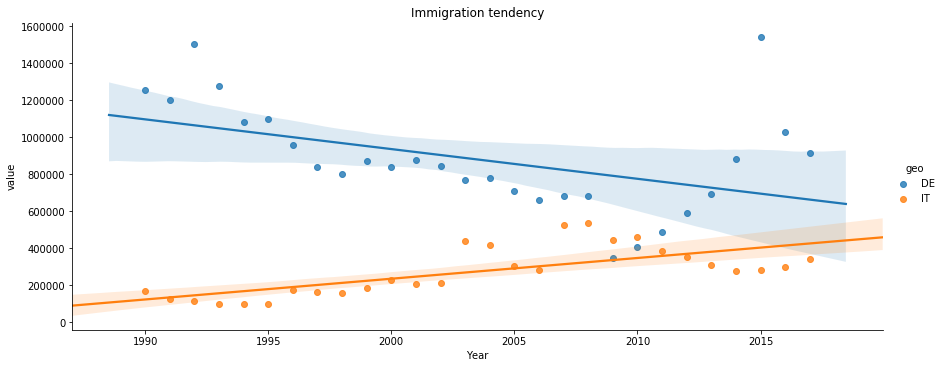

In [10]:
sb.lmplot(x='Year',y='value',data=imm_de_it,hue='geo',aspect=2.5/1)
plt.title('Immigration tendency')

Text(0.5, 1, 'Emigration tendency')

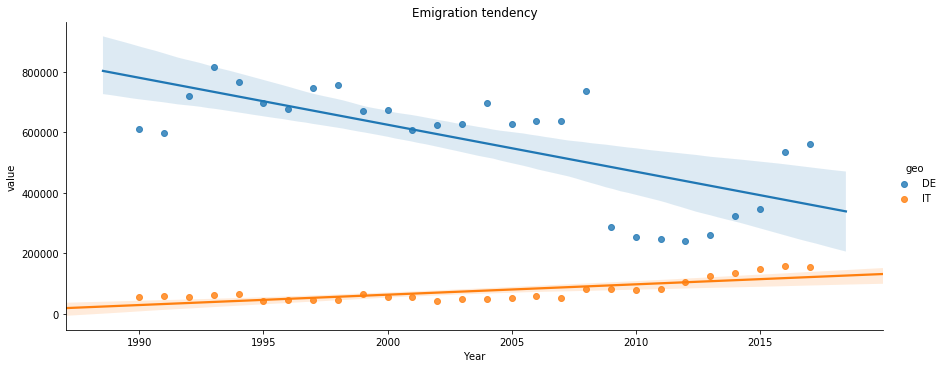

In [11]:
sb.lmplot(x='Year',y='value',data=emi_de_it,hue='geo',aspect=2.5/1)
plt.title('Emigration tendency')

#### From 2010

Text(0.5, 1, 'Immigration tendency from 2010')

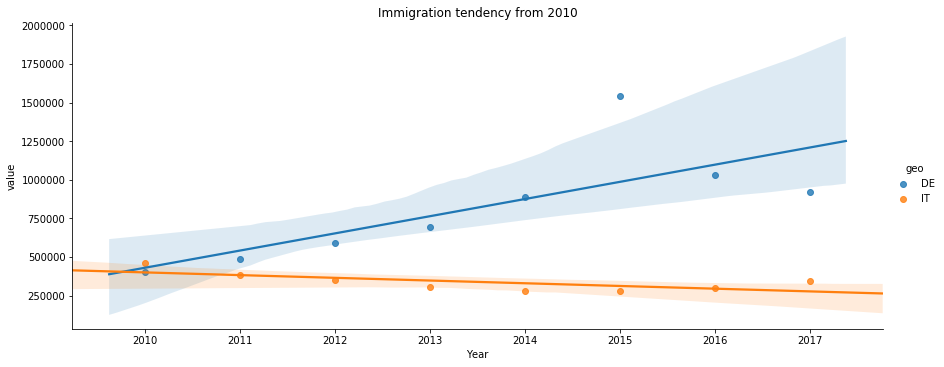

In [12]:
sb.lmplot(x='Year',y='value',data=imm_de_it[imm_de_it['Year']>=2010],hue='geo',aspect=2.5/1)
plt.title('Immigration tendency from 2010')

Text(0.5, 1, 'Emigration tendency from 2010')

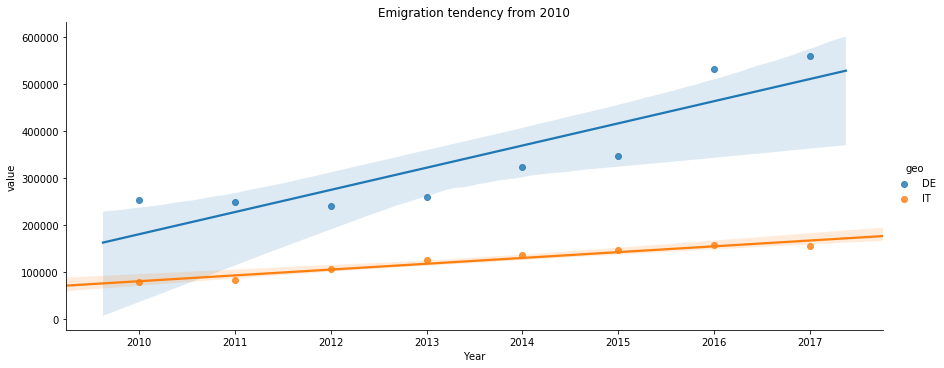

In [13]:
sb.lmplot(x='Year',y='value',data=emi_de_it[emi_de_it['Year']>=2010],hue='geo',aspect=2.5/1)
plt.title('Emigration tendency from 2010')

## Emigration and immigration rates compared to population

### Preparing data

In [14]:
pop =  eurostat.get_data_df('demo_pjan')

In [15]:
pop.head()

,unit,age,sex,geo\time,2018,2017,2016,2015,2014,2013,...,1969,1968,1967,1966,1965,1964,1963,1962,1961,1960
0,NR,TOTAL,F,AD,NaN,NaN,NaN,NaN,NaN,37408.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NR,TOTAL,F,AL,1431715.0,1423050.0,1417141.0,1424597.0,1430827.0,1437193.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NR,TOTAL,F,AM,1564533.0,1567380.0,1569535.0,1571450.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NR,TOTAL,F,AT,4483749.0,4460424.0,4427918.0,4384529.0,4352447.0,4328238.0,...,3932691.0,3922359.0,3899799.0,3876559.0,3857760.0,3836415.0,3814191.0,3794130.0,3773097.0,3757167.0
4,NR,TOTAL,F,AZ,4960058.0,4918771.0,4870002.0,4817181.0,4763571.0,4707690.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
pop = pop[(pop['age']=='TOTAL') & (pop['sex']=='T')].drop(axis=1,labels=['age','unit','sex']).rename(axis=1,mapper={'geo\\time':'geo'}).melt('geo',var_name='Year')

In [17]:
pop['Year']=pop['Year'].astype(int)
pop.head()

,geo,Year,value
0,AD,2018,NaN
1,AL,2018,2870324.0
2,AM,2018,2972732.0
3,AT,2018,8822267.0
4,AZ,2018,9898085.0


In [18]:
pop_de_it = pop[(pop['geo']=='DE')|(pop['geo']=='IT')].copy()

In [19]:
pop_de_it.head()

,geo,Year,value
12,DE,2018,82792351.0
33,IT,2018,60483973.0
70,DE,2017,82521653.0
91,IT,2017,60589445.0
128,DE,2016,82175684.0


### Raw population values

Text(0.5, 1, 'Population')

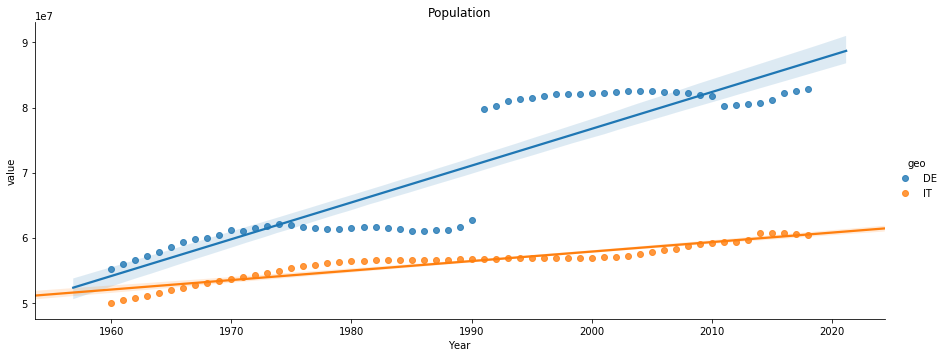

In [20]:
sb.lmplot(x='Year',y='value',data=pop_de_it,hue='geo',aspect=2.5/1)
plt.title('Population')

### Immigration and emigration vs population

In [21]:
imm_pop = pd.merge(left=pop_de_it,right=imm_de_it,on=('geo','Year'),suffixes=('_pop','_imm'))
emi_pop = pd.merge(left=pop_de_it,right=emi_de_it,on=('geo','Year'),suffixes=('_pop','_emi'))

In [22]:
imm_pop['immigration/population'] = imm_pop.apply(lambda x: x.value_imm / x.value_pop, axis=1)
emi_pop['emigration/population'] = emi_pop.apply(lambda x: x.value_emi / x.value_pop, axis=1)

In [23]:
imm_pop.head()

,geo,Year,value_pop,value_imm,immigration/population
0,DE,2017,82521653.0,917109.0,0.011114
1,IT,2017,60589445.0,343440.0,0.005668
2,DE,2016,82175684.0,1029852.0,0.012532
3,IT,2016,60665551.0,300823.0,0.004959
4,DE,2015,81197537.0,1543848.0,0.019013


In [24]:
emi_pop.head()

,geo,Year,value_pop,value_emi,emigration/population
0,DE,2017,82521653.0,560700.0,0.006795
1,IT,2017,60589445.0,155110.0,0.002560
2,DE,2016,82175684.0,533762.0,0.006495
3,IT,2016,60665551.0,157065.0,0.002589
4,DE,2015,81197537.0,347162.0,0.004276


Text(0.5, 1, 'Immigration/population')

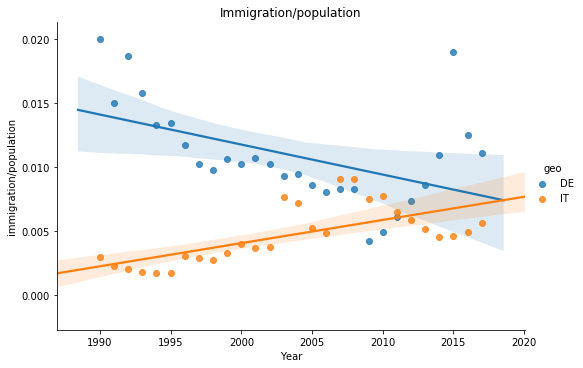

In [25]:
sb.lmplot(data=imm_pop,x='Year',y='immigration/population',hue='geo',aspect=1.5)
plt.title('Immigration/population')

Text(0.5, 1, 'Emigration/population')

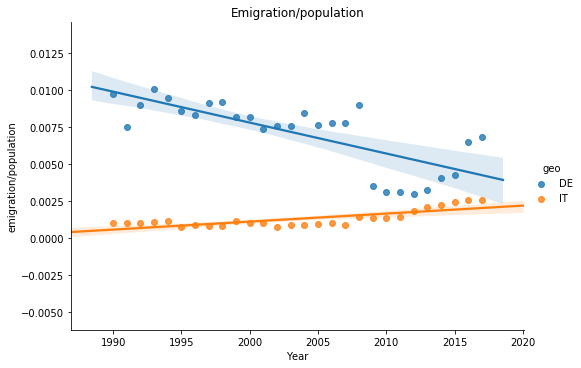

In [26]:
sb.lmplot(data=emi_pop,x='Year',y='emigration/population',hue='geo',aspect=1.5)
plt.title('Emigration/population')

#### From 2010

Text(0.5, 1, 'Immigration/population from 2010')

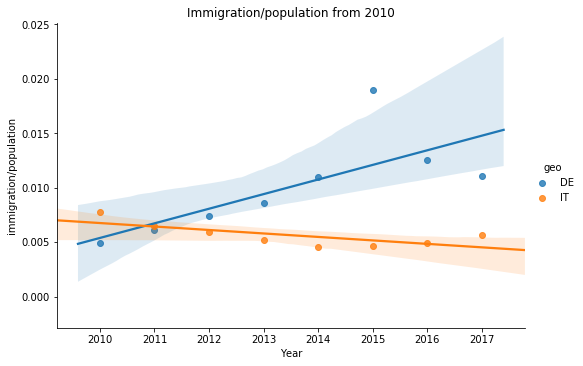

In [27]:
sb.lmplot(data=imm_pop[imm_pop['Year']>=2010],x='Year',y='immigration/population',hue='geo',aspect=1.5)
plt.title('Immigration/population from 2010')

Text(0.5, 1, 'Emigration/population from 2010')

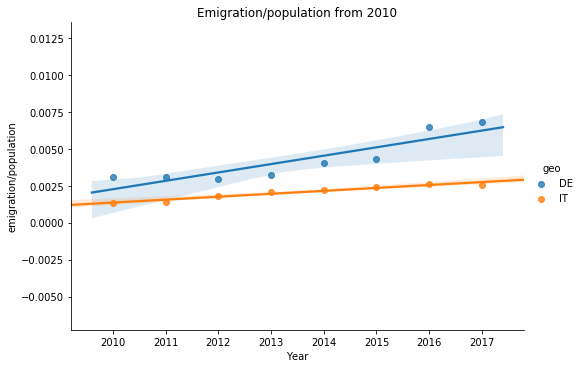

In [28]:
sb.lmplot(data=emi_pop[emi_pop['Year']>=2010],x='Year',y='emigration/population',hue='geo',aspect=1.5)
plt.title('Emigration/population from 2010')